In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
dataset="/content/contentdrive/MyDrive/data_maskdetection"

In [ ]:
with_mask_files = os.listdir('/content/contentdrive/MyDrive/data_maskdetection/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3425.jpg', 'with_mask_3415.jpg', 'with_mask_3502.jpg', 'with_mask_3467.jpg', 'with_mask_3511.jpg']
['with_mask_1199.jpg', 'with_mask_1166.jpg', 'with_mask_1893.jpg', 'with_mask_1338.jpg', 'with_mask_1488.jpg']


In [ ]:
without_mask_files = os.listdir('/content/contentdrive/MyDrive/data_maskdetection/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_42.jpg', 'without_mask_2725.jpg', 'without_mask_338.jpg', 'without_mask_2880.jpg', 'without_mask_3489.jpg']
['without_mask_1573.jpg', 'without_mask_1929.jpg', 'without_mask_1264.jpg', 'without_mask_1680.jpg', 'without_mask_2637.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3838


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [ ]:
 # create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3838

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

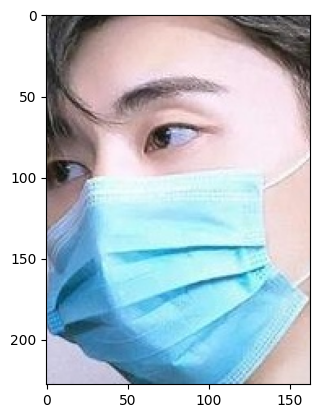

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/contentdrive/MyDrive/data_maskdetection/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

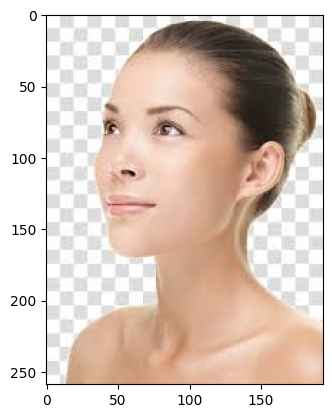

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/contentdrive/MyDrive/data_maskdetection/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/contentdrive/MyDrive/data_maskdetection/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/contentdrive/MyDrive/data_maskdetection/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

7563

In [ ]:
data[0]

array([[[142, 147, 125],
        [143, 146, 125],
        [137, 141, 121],
        ...,
        [150, 176, 189],
        [144, 159, 166],
        [137, 142, 137]],

       [[140, 145, 123],
        [139, 143, 121],
        [130, 136, 115],
        ...,
        [146, 165, 172],
        [140, 146, 145],
        [132, 130, 117]],

       [[138, 144, 122],
        [130, 137, 116],
        [122, 130, 110],
        ...,
        [144, 152, 150],
        [135, 132, 120],
        [130, 124, 104]],

       ...,

       [[ 34,  43,  50],
        [ 34,  46,  52],
        [ 36,  49,  56],
        ...,
        [ 55,  66,  67],
        [ 52,  60,  65],
        [ 44,  50,  55]],

       [[ 31,  39,  45],
        [ 34,  45,  50],
        [ 37,  50,  56],
        ...,
        [ 54,  64,  66],
        [ 53,  62,  66],
        [ 46,  52,  56]],

       [[ 30,  39,  44],
        [ 32,  43,  48],
        [ 35,  48,  55],
        ...,
        [ 55,  65,  67],
        [ 55,  64,  67],
        [ 47,  53,  57]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=41)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7563, 128, 128, 3) (6050, 128, 128, 3) (1513, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[ 27,  11,   1],
        [ 31,  14,   4],
        [ 34,  17,   7],
        ...,
        [ 10,   5,   8],
        [ 10,   4,   8],
        [  9,   3,   7]],

       [[ 25,  11,   1],
        [ 30,  16,   5],
        [ 35,  21,  10],
        ...,
        [ 12,   5,   9],
        [ 12,   5,   9],
        [ 11,   4,   8]],

       [[ 29,  15,   6],
        [ 33,  19,  10],
        [ 35,  21,  11],
        ...,
        [ 14,   5,  10],
        [ 14,   5,  10],
        [ 13,   4,   9]],

       ...,

       [[161, 132, 126],
        [165, 136, 130],
        [170, 141, 135],
        ...,
        [128,  84,  44],
        [129,  84,  44],
        [129,  81,  43]],

       [[162, 135, 131],
        [165, 139, 134],
        [170, 144, 139],
        ...,
        [130,  84,  46],
        [130,  83,  46],
        [127,  81,  45]],

       [[164, 139, 134],
        [167, 143, 138],
        [171, 146, 141],
        ...,
        [126,  81,  44],
        [123,  77,  41],
        [117,  73,  38]]

In [ ]:
X_train_scaled[0]

array([[[0.10588235, 0.04313725, 0.00392157],
        [0.12156863, 0.05490196, 0.01568627],
        [0.13333333, 0.06666667, 0.02745098],
        ...,
        [0.03921569, 0.01960784, 0.03137255],
        [0.03921569, 0.01568627, 0.03137255],
        [0.03529412, 0.01176471, 0.02745098]],

       [[0.09803922, 0.04313725, 0.00392157],
        [0.11764706, 0.0627451 , 0.01960784],
        [0.1372549 , 0.08235294, 0.03921569],
        ...,
        [0.04705882, 0.01960784, 0.03529412],
        [0.04705882, 0.01960784, 0.03529412],
        [0.04313725, 0.01568627, 0.03137255]],

       [[0.11372549, 0.05882353, 0.02352941],
        [0.12941176, 0.0745098 , 0.03921569],
        [0.1372549 , 0.08235294, 0.04313725],
        ...,
        [0.05490196, 0.01960784, 0.03921569],
        [0.05490196, 0.01960784, 0.03921569],
        [0.05098039, 0.01568627, 0.03529412]],

       ...,

       [[0.63137255, 0.51764706, 0.49411765],
        [0.64705882, 0.53333333, 0.50980392],
        [0.66666667, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
num_of_classes = 2

model=Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),padding='same',  activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3),padding='same',  activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_of_classes, activation='sigmoid')
])

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, epochs=10)

Epoch 1/10
190/190 [==============================] - 15s 17ms/step - loss: 0.3787 - accuracy: 0.8344
Epoch 2/10
190/190 [==============================] - 3s 16ms/step - loss: 0.2172 - accuracy: 0.9122
Epoch 3/10
190/190 [==============================] - 3s 18ms/step - loss: 0.1799 - accuracy: 0.9319
Epoch 4/10
190/190 [==============================] - 3s 18ms/step - loss: 0.1035 - accuracy: 0.9641
Epoch 5/10
190/190 [==============================] - 3s 17ms/step - loss: 0.0676 - accuracy: 0.9742
Epoch 6/10
190/190 [==============================] - 3s 16ms/step - loss: 0.1201 - accuracy: 0.9565
Epoch 7/10
190/190 [==============================] - 3s 17ms/step - loss: 0.0457 - accuracy: 0.9853
Epoch 8/10
190/190 [==============================] - 4s 19ms/step - loss: 0.0253 - accuracy: 0.9909
Epoch 9/10
190/190 [==============================] - 3s 16ms/step - loss: 0.0255 - accuracy: 0.9919
Epoch 10/10
190/190 [==============================] - 3s 16ms/step - loss: 0.0153 - accur

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 10ms/step - loss: 0.3844 - accuracy: 0.9306
Test Accuracy = 0.9306014776229858


48/48 [==============================] - 0s 7ms/step


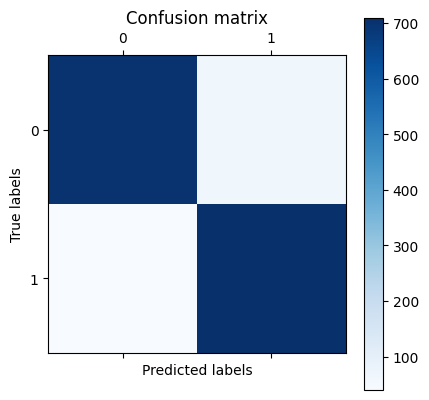

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test_scaled).argmax(axis=1)
plt.matshow(confusion_matrix(Y_test, y_pred), cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()


The output of a CNN image classification model is a vector of probabilities, where each probability represents the likelihood of the input image belonging to a particular class. The class with the highest probability is the predicted class for the image.

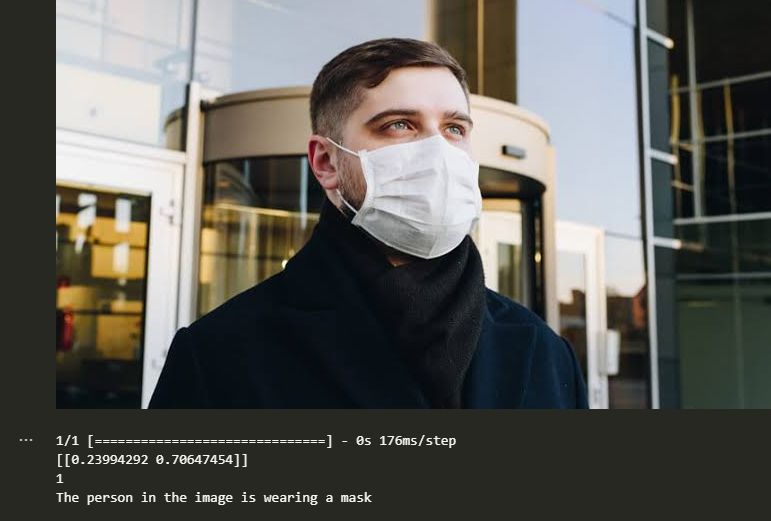

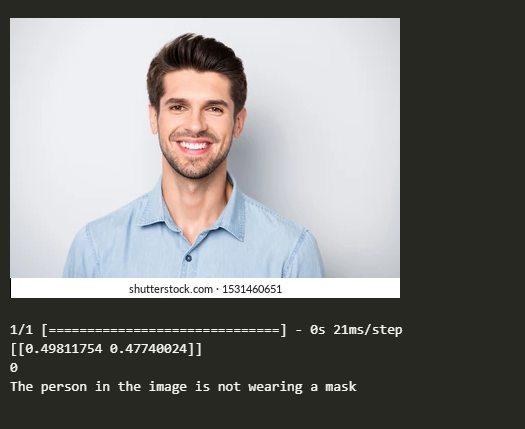